In [8]:
pip install opencv-python Pillow albumentations numpy matplotlib tqdm datasets

Note: you may need to restart the kernel to use updated packages.


In [9]:
import numpy as np
import pandas as pd
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
from datasets import load_dataset
import random
import io
import os
import sys

sys.path.append(os.path.abspath(".."))
from objects.receipt_preprocessor import ReceiptPreprocessor
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 10)

In [10]:
print("Loading dataset from Hugging Face...")
dataset = load_dataset("mychen76/invoices-and-receipts_ocr_v2")

print(f"Dataset splits: {dataset.keys()}")
for split in dataset.keys():
    print(f"Number of samples in {split}: {len(dataset[split])}")

Loading dataset from Hugging Face...
Dataset splits: dict_keys(['train', 'test', 'valid'])
Number of samples in train: 2843
Number of samples in test: 225
Number of samples in valid: 170


In [11]:
current_dir = os.getcwd()
# print(current_dir)
project_root = os.path.dirname(current_dir)
# print(project_root)
output_dir = os.path.join(project_root, "preprocessed_receipts")
# output_dir = "preprocessed_receipts"

preprocessor = ReceiptPreprocessor(dataset=dataset)

Setting output directory to: /Users/nealkimchi/UO/winter2025/dsci410/receipt_ocr/preprocessed_data



Visualizing preprocessing examples:

Sample 0


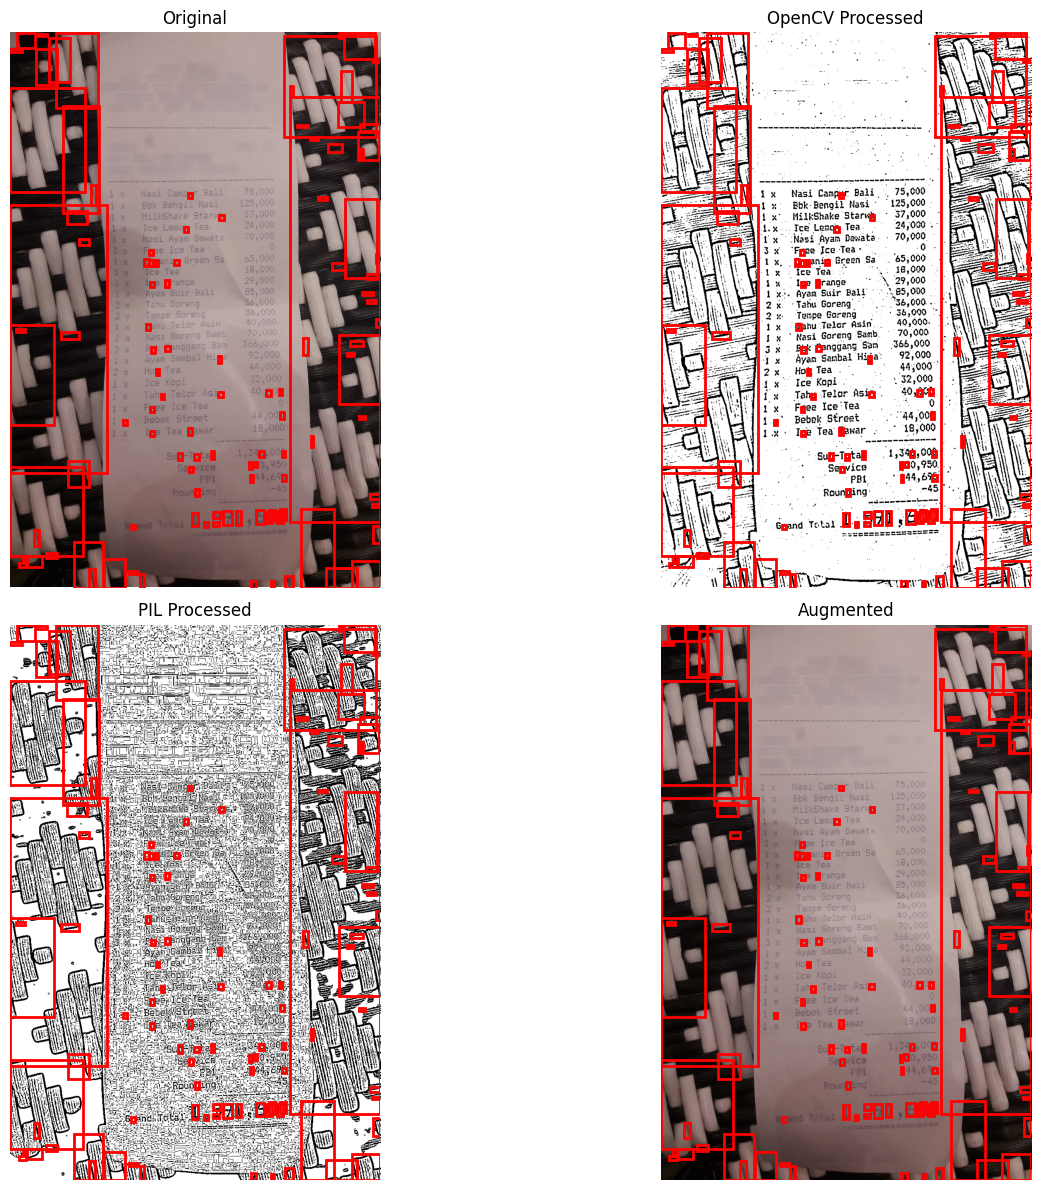

Original detected boxes: 117
Merged boxes: 111
Augmented boxes: 111
Original boxes detected: 117
After merging: 111

Sample 1


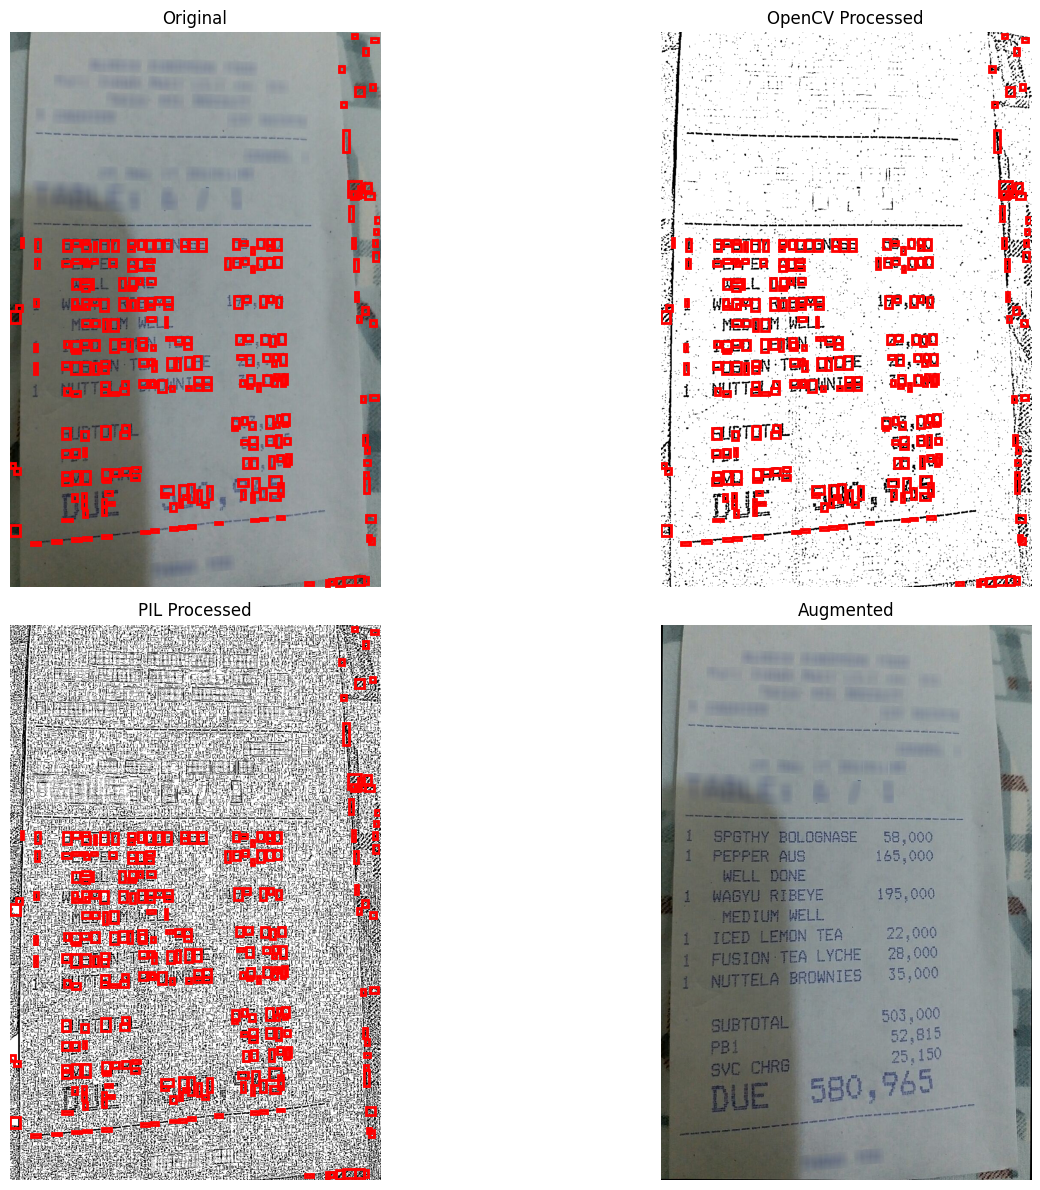

Original detected boxes: 287
Merged boxes: 275
Original boxes detected: 287
After merging: 275

Sample 2


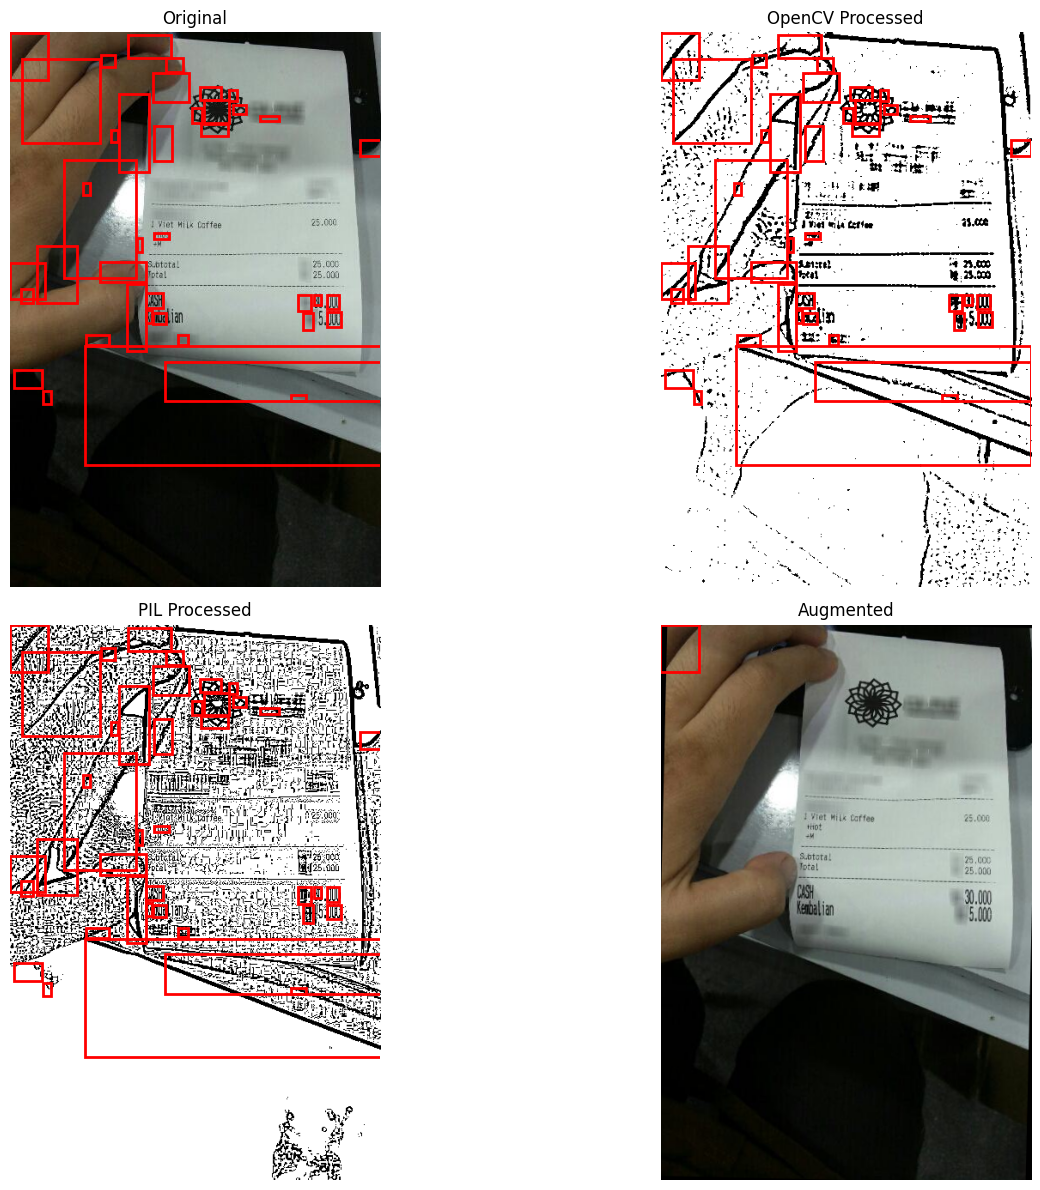

Original detected boxes: 45
Merged boxes: 41
Augmented boxes: 1
Original boxes detected: 45
After merging: 41


In [12]:
# Preprocessing pipeline
print("\nVisualizing preprocessing examples:")
for i in range(3):
    print(f"\n{'='*50}\nSample {i}\n{'='*50}")
    result = preprocessor.visualize_processed_image(i, show_boxes=True)
    
    if result:
        print(f"Original boxes detected: {len(result['original_boxes'])}")
        print(f"After merging: {len(result['merged_boxes'])}")

In [13]:
print("\nProcessing a small batch of training data...")
small_batch_stats = preprocessor.prepare_dataset(
    split="train", 
    num_samples=10,
    augment=True
)
# Print statistics from the small batch processing
print(f"\nSmall batch processing results:")
print(f"Total images processed: {small_batch_stats['total_processed']}")
print(f"Total text regions detected: {small_batch_stats['total_boxes_detected']}")
print(f"Images with text regions: {small_batch_stats['images_with_boxes']} " + 
      f"({small_batch_stats['images_with_boxes']/small_batch_stats['total_processed']*100:.1f}%)")


Processing a small batch of training data...


Processing train images:   0%|          | 0/10 [00:00<?, ?it/s]


Small batch processing results:
Total images processed: 10
Total text regions detected: 7275
Images with text regions: 10 (100.0%)


In [14]:
process_full_dataset = True
if process_full_dataset:
    print("\nProcessing full training dataset...")
    train_stats = preprocessor.prepare_dataset(
        split="train", 
        num_samples=100,
        augment=True
    )
    
    print("\nProcessing validation dataset...")
    val_stats = preprocessor.prepare_dataset(
        split="valid", 
        num_samples=20, 
        augment=False
    )
    
    print(f"\nFull dataset processing results:")
    print(f"Training images processed: {train_stats['total_processed']}")
    print(f"Training text regions detected: {train_stats['total_boxes_detected']}")
    print(f"Training images with text: {train_stats['images_with_boxes']} " + 
          f"({train_stats['images_with_boxes']/train_stats['total_processed']*100:.1f}%)")
    print(f"Validation images processed: {val_stats['total_processed']}")
    print(f"Validation text regions detected: {val_stats['total_boxes_detected']}")
    print(f"Validation images with text: {val_stats['images_with_boxes']} " + 
          f"({val_stats['images_with_boxes']/val_stats['total_processed']*100:.1f}%)")



Processing full training dataset...


Processing train images:   0%|          | 0/100 [00:00<?, ?it/s]


Processing validation dataset...


Processing valid images:   0%|          | 0/20 [00:00<?, ?it/s]


Full dataset processing results:
Training images processed: 100
Training text regions detected: 38003
Training images with text: 100 (100.0%)
Validation images processed: 20
Validation text regions detected: 4032
Validation images with text: 20 (100.0%)
